# Cardiovascular Disease Detection

Features:

1.	Age | Objective Feature | age | int (days)


2.	Height | Objective Feature | height | int (cm) |


3.	Weight | Objective Feature | weight | float (kg) |


4.	Gender | Objective Feature | gender | categorical code |


5.	Systolic blood pressure | Examination Feature | ap_hi | int |


6.	Diastolic blood pressure | Examination Feature | ap_lo | int |


7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |


8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |


9.	Smoking | Subjective Feature | smoke | binary |


10.	Alcohol intake | Subjective Feature | alco | binary |


11.	Physical activity | Subjective Feature | active | binary |


12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


# Algorithms considered:

* Logistic Regression


* Naive Bayes


* K-Nearest Neighbors


* Decision Tree


* Random Forest.

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cardio_train.csv',sep=';',na_values=".")

In [3]:
# first five row

df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [4]:
df.shape

(69301, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
# droping id column and converting age column to years

df['age'] = ( df['age'] / 365).round(0)
df.drop('id', axis = 1, inplace = True)

In [7]:
df['age']

0        62.0
1        40.0
2        60.0
3        40.0
4        64.0
         ... 
69296    53.0
69297    62.0
69298    52.0
69299    61.0
69300    56.0
Name: age, Length: 69301, dtype: float64

In [8]:
df.head(50)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,62.0,1,155,69.0,130,80,2,2,0,0,1,0
1,40.0,1,163,71.0,110,70,1,1,0,0,1,1
2,60.0,1,165,70.0,120,80,1,1,0,0,1,0
3,40.0,2,165,85.0,120,80,1,1,1,1,1,0
4,64.0,1,155,62.0,120,80,1,1,0,0,1,0
5,58.0,1,164,61.0,100,70,1,1,0,0,1,0
6,50.0,1,162,72.0,100,70,1,1,0,0,1,0
7,62.0,1,161,93.0,140,90,2,1,0,0,1,1
8,58.0,1,157,68.0,110,80,1,1,0,0,1,0
9,61.0,1,158,65.0,140,90,3,1,0,0,1,1


In [9]:
df.isnull()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,False,False,False,False,False,False,False,False,False,False,False,False
69297,False,False,False,False,False,False,False,False,False,False,False,False
69298,False,False,False,False,False,False,False,False,False,False,False,False
69299,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

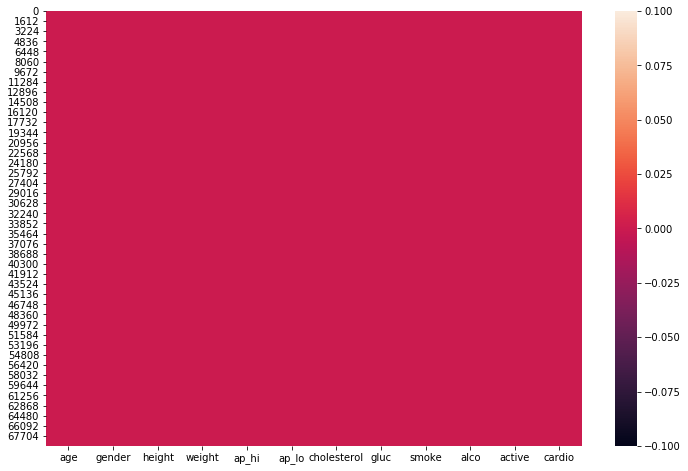

In [11]:
fig=plt.subplots(figsize=(12,8))

sns.heatmap(df.isnull())

In [12]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [13]:
# using the describe function

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,69301.0,53.338177,6.765427,30.0,48.0,54.0,58.0,65.0
gender,69301.0,1.349519,0.476821,1.0,1.0,1.0,2.0,2.0
height,69301.0,164.362217,8.205337,55.0,159.0,165.0,170.0,250.0
weight,69301.0,74.203027,14.383469,10.0,65.0,72.0,82.0,200.0
ap_hi,69301.0,128.829584,154.775805,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69301.0,96.650092,189.096240,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69301.0,1.366806,0.680270,1.0,1.0,1.0,2.0,3.0
gluc,69301.0,1.226447,0.572246,1.0,1.0,1.0,1.0,3.0
smoke,69301.0,0.088051,0.283371,0.0,0.0,0.0,0.0,1.0
alco,69301.0,0.053881,0.225784,0.0,0.0,0.0,0.0,1.0


# Exploratory data analysis

Exploratory Data Analysis – Exploratory analysis is the first step of data analysis. Here we get familiar with data, ask questions, visualize the data in a number of forms, look for the relationships between the variables, look for the outliers, patterns and trends in data set.

# Univariate Analysis for continuos Variables

1    51868
2     9446
3     7987
Name: cholesterol, dtype: int64


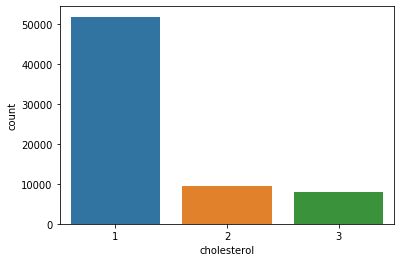

In [14]:
# Univariate Analysis
# Percentage of patient with Choloestrol problems in the given dataset
ax = sns.countplot(df["cholesterol"])
target=df.cholesterol.value_counts()
print(target)

In [15]:
print("Percentage of patience cholesterol normal: "+str(round(target[1]*100/69301,2)))
print("Percentage of patience cholesterol above normal: "+str(round(target[2]*100/69301,2)))
print("Percentage of patience cholesterol well above normal: "+str(round(target[3]*100/69301,2)))

Percentage of patience cholesterol normal: 74.84
Percentage of patience cholesterol above normal: 13.63
Percentage of patience cholesterol well above normal: 11.53


In [16]:
df["gender"].unique()

array([1, 2], dtype=int64)

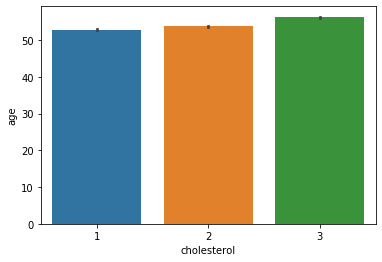

In [17]:
sns.barplot(df["cholesterol"],df["age"])

1: normal, 2: above normal, 3: well above normal 

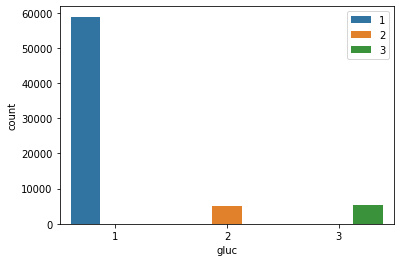

In [18]:
ctp=sns.countplot(x='gluc',hue="gluc",data=df)
plt.legend()

1: normal, 2: above normal, 3: well above normal 

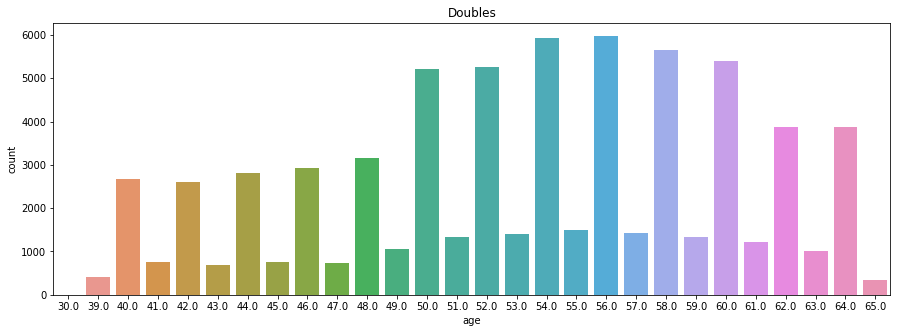

In [19]:
plt.subplots(figsize=(15,5))
sns.countplot(x='age',data=df)
plt.title('Doubles')
plt.show()

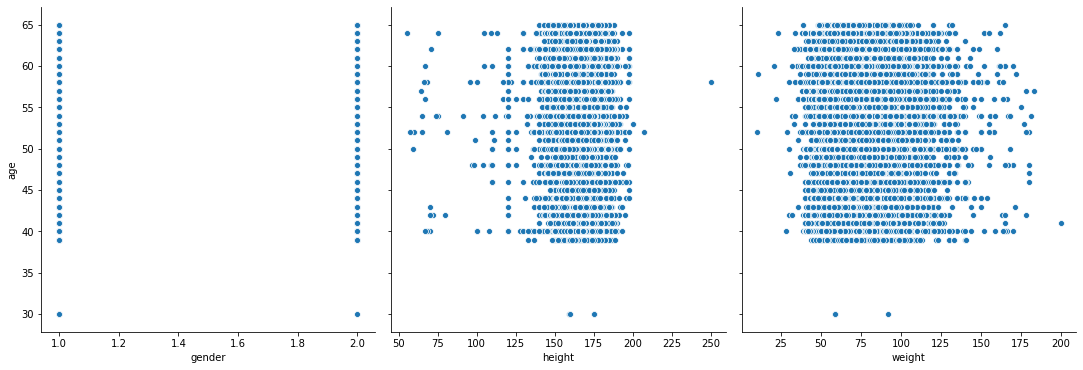

In [20]:
sns.pairplot(df,x_vars=['gender','height','weight'],y_vars='age',height=5,aspect=1,kind='scatter')
plt.show()

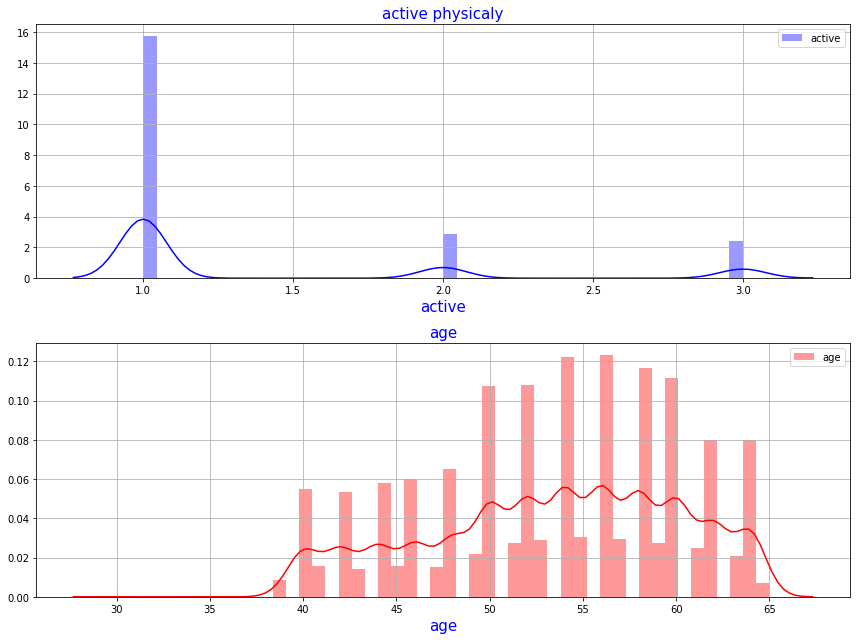

In [21]:
# two plots in parallel way up down

f,ax=plt.subplots(figsize=(12,9))
plt.subplot(2,1,1)
sns.distplot(df.cholesterol,color="blue",label="active");
plt.title("active physicaly",fontsize=15,color='blue')
plt.xlabel('active',fontsize=15,color='blue')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
sns.distplot(df.age,color="red",label="age");
plt.title("age",fontsize = 15,color='blue')
plt.xlabel('age',fontsize=15,color='blue')
plt.tight_layout()
plt.legend()
plt.grid()

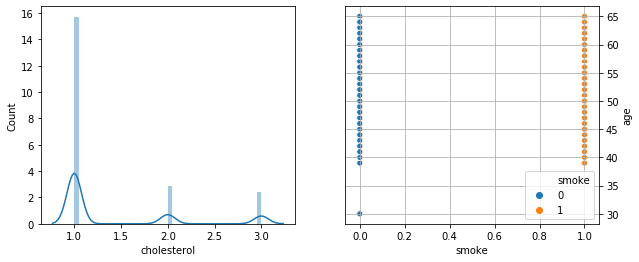

In [22]:
# two plots in parallel way

p, fig=plt.subplots(1,2,figsize=(10,4))
plt.grid()

sns.distplot(df['cholesterol'],ax=fig[0])
fig[0].set_xlabel('cholesterol',fontsize=10)
fig[0].set_ylabel('Count',fontsize=10)
fig[0].yaxis.tick_left()


sns.scatterplot(x ='smoke',y='age',data=df,hue='smoke',ax=fig[1])
fig[1].set_xlabel('smoke',fontsize=10)
fig[1].set_ylabel('age',fontsize=10)
fig[1].yaxis.set_label_position("right")
fig[1].yaxis.tick_right()


plt.show()

# Univariate Analysis for categorical Variables

In [23]:

categorial = [('gender', ['female', 'male']), 
              ('cholesterol', ['normal', 'above normal', 'well above normal']), 
              ('gluc', ['normal', 'above normal', 'well above normal'])]

In [24]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [25]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='cardio', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'cardio']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='cardio', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

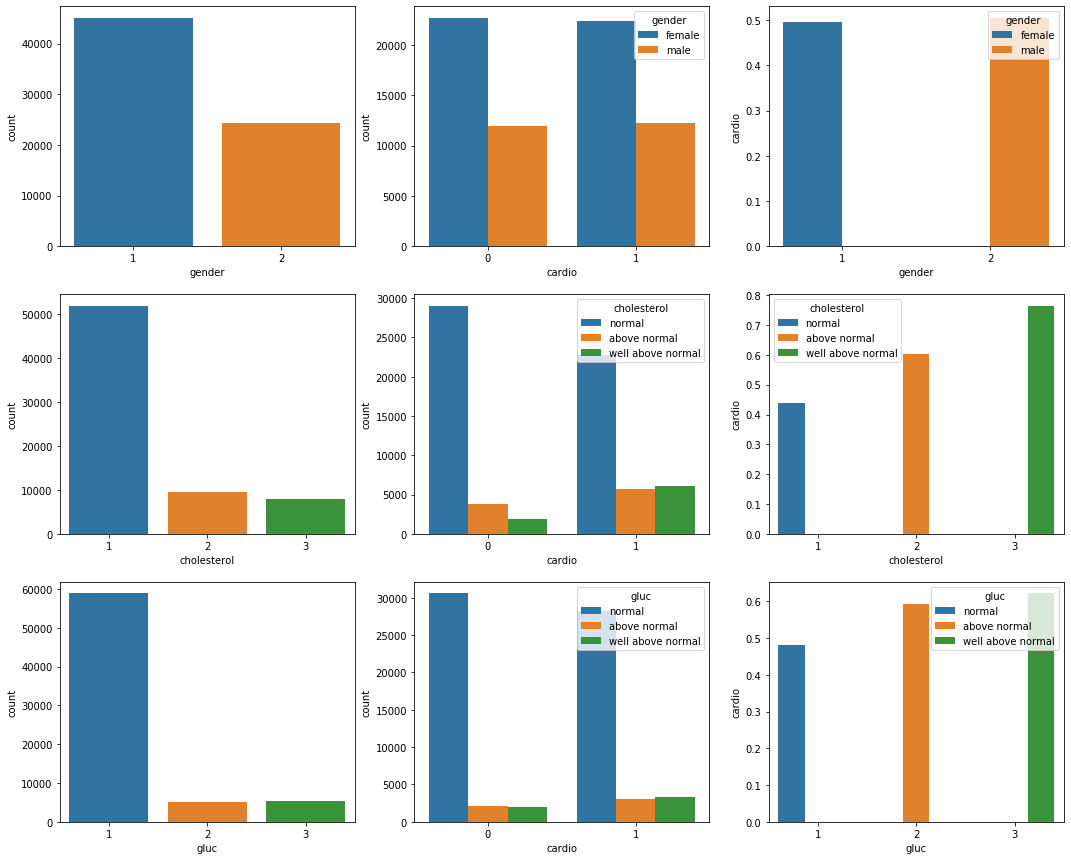

In [26]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(18, 15))

plotGrid(isCategorial=True)

# Categorical - Categorical Bivariate Analysis

In [27]:
# creating pivot table group by target

df2=df.groupby('cardio')

# Display first few rows
df2.first()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,62.0,1,155,69.0,130,80,2,2,0,0,1
1,40.0,1,163,71.0,110,70,1,1,0,0,1


In [28]:
# pivot table 2 target cross check with dataset
df3=df.groupby(['smoke','age'])

df3.first()

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  alco  \
smoke age                                                                   
0     30.0       1     175    59.0    120     80            1     1     0   
      39.0       1     169    67.0    120     80            1     1     0   
      40.0       1     163    71.0    110     70            1     1     0   
      41.0       2     160    62.0    120     80            1     1     0   
      42.0       2     169   103.0    120     80            1     1     0   
      43.0       1     147    55.0    120     90            1     1     0   
      44.0       1     161    55.0    100     60            1     1     0   
      45.0       2     170    96.0    140     80            2     1     0   
      46.0       1     153    57.0    120     80            3     2     0   
      47.0       2     169    62.0    100     80            3     1     0   
      48.0       1     162    80.0    120     80            1     1     0   
      49.0       2     160    85.0    120     60            1     1     0   
      50.0       1     162    72.0    100     70            1     1     0   
      51.0       1     167    74.0    120     80            1     1     0   
      52.0       1     154    70.0    110     70            1     1     0   
      53.0       1     160    71.0    160    100            3     1     0   
      54.0       1     165    90.0    140     90            1     1     0   
      55.0       2     146    45.0    120     80            1     1     0   
      56.0       2     169    82.0    130     90            1     1     0   
      57.0       2     163    96.0    130     60            1     1     0   
      58.0       1     164    61.0    100     70            1     1     0   
      59.0       1     168    90.0    140     90            3     2     0   
      60.0       1     165    70.0    120     80            1     1     0   
      61.0       1     158    65.0    140     90            3     1     0   
      62.0       1     155    69.0    130     80            2     2     0   
      63.0       2     150    56.0    130     80            2     1     0   
      64.0       1     155    62.0    120     80            1     1     0   
      65.0       1     159    60.0    120     80            1     1     0   
1     39.0       2     168    64.0     11     60            1     1     1   
      40.0       2     165    85.0    120     80            1     1     1   
      41.0       2     175    68.0    120     80            1     1     1   
      42.0       2     170    80.0    110     70            1     1     0   
      43.0       2     176    76.0    120     80            2     1     1   
      44.0       2     179    87.0    140     78            1     1     1   
      45.0       2     163    84.0    130     90            1     1     0   
      46.0       1     160    77.0    140     90            2     2     0   
      47.0       2     168    63.0    150   1100            1     1     1   
      48.0       2     172    90.0    110     70            1     1     0   
      49.0       2     180   134.0    160     90            1     3     1   
      50.0       2     174    82.0    100     70            1     1     1   
      51.0       1     164    70.0    150     90            3     1     0   
      52.0       2     163    55.0    120     80            3     1     0   
      53.0       2     182    88.0    120     90            3     1     0   
      54.0       2     160    58.0    120     80            1     1     0   
      55.0       1     156    62.0    120     80            1     1     0   
      56.0       2     167    74.0    130     70            1     1     0   
      57.0       2     165    83.0    140     90            2     2     0   
      58.0       2     169    76.0    140   1000            3     3     0   
      59.0       2     170    71.0    130     80            1     1     0   
      60.0       2     164    66.0    150    100            1     1     1   
      61

In [29]:
# crosstab pivot table

pd.crosstab(df["cholesterol"],df["gender"],margins=True)

gender,1,2,All
cholesterol,,,
1,33235,18633,51868
2,6336,3110,9446
3,5508,2479,7987
All,45079,24222,69301


In [30]:
pd.crosstab(df["height"],df["age"],margins=True)

age,30.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,...,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,All
height,,,,,,,,,,,,,,,,,,,,,
55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
64,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0,0,0,0,0,0,1,1,1,0,...,0,1,1,1,2,2,0,1,0,14
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


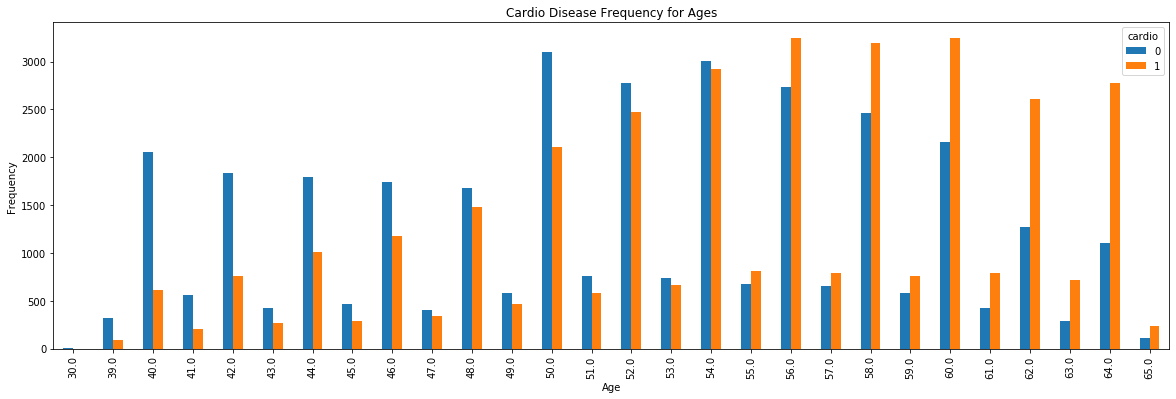

In [31]:
# cardio Disease Frequency for ages

pd.crosstab(df.age,df.cardio).plot(kind="bar",figsize=(20,6))
plt.title('Cardio Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

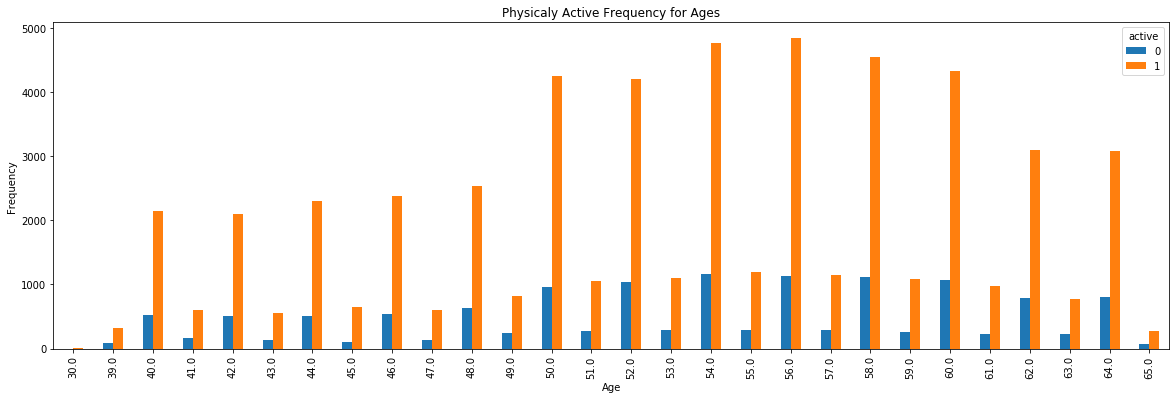

In [32]:
# physical active Disease Frequency for ages

pd.crosstab(df.age,df.active).plot(kind="bar",figsize=(20,6))
plt.title('Physicaly Active Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('PhysicalyActiveAges.png')
plt.show()

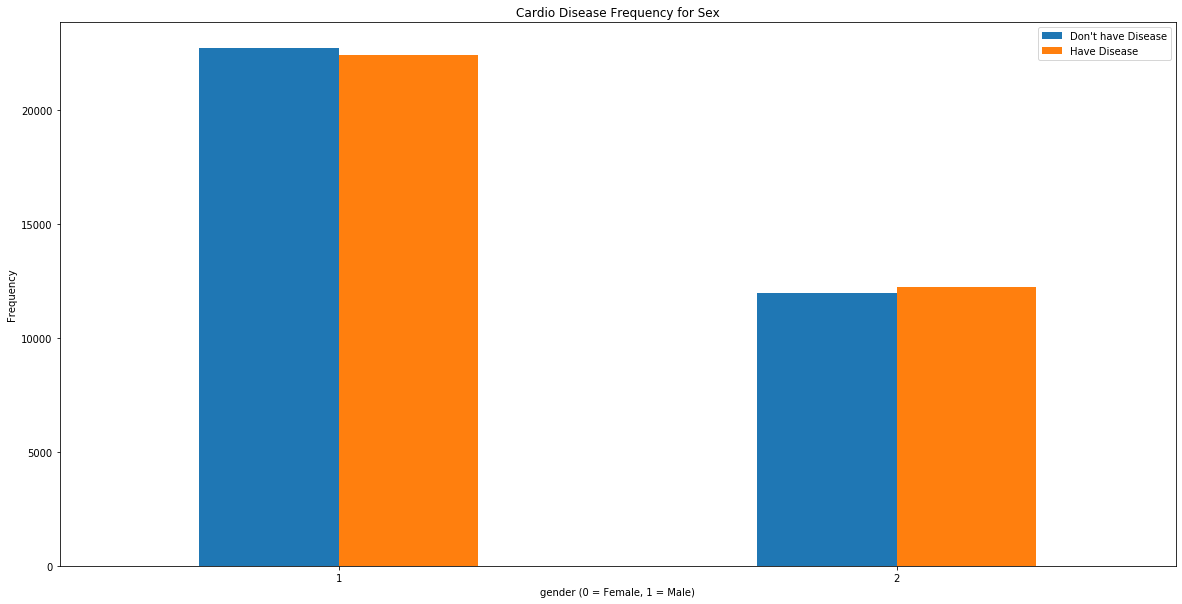

In [33]:
# cardio Disease frequency for sex (where 0 is female and 1 is male
pd.crosstab(df.gender,df.cardio).plot(kind="bar",figsize=(20,10))
plt.title('Cardio Disease Frequency for Sex')
plt.xlabel('gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

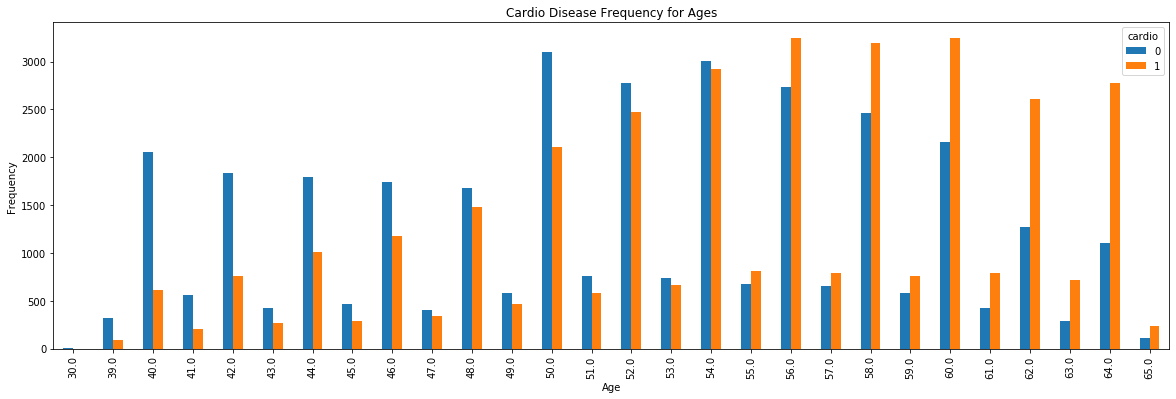

In [34]:
#pd.crosstab(df.age,df.cardio).plot(kind="bar",figsize=(20,6))
#plt.title('Cardio Disease Frequency for Ages')
#plt.xlabel('Age')
#plt.ylabel('Frequency')
#plt.savefig('heartDiseaseAndAges.png')
#plt.show()

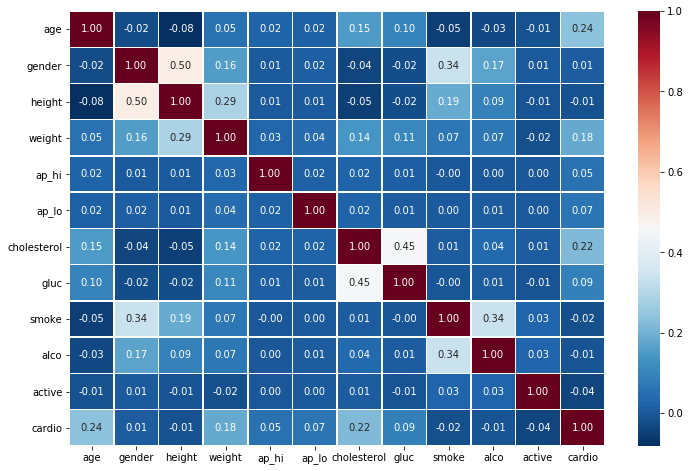

In [35]:
# checking correlation in heatmap

f,ax=plt.subplots(figsize=(12,8))
corr=df.corr()
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr,annot=True,cmap='RdBu_r',linewidths=0.5,linecolor="white",fmt='.2f',ax=ax)

In [36]:
corr['cardio'].sort_values(ascending=False)

cardio         1.000000
age            0.237709
cholesterol    0.220752
weight         0.182094
gluc           0.089062
ap_lo          0.065290
ap_hi          0.054211
gender         0.008592
alco          -0.007217
height        -0.011015
smoke         -0.015225
active        -0.035592
Name: cardio, dtype: float64

# Model Development


Extracting labels from input data frame (df)

In [37]:
# import liabraries:

# ML sklearn model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# stats
import statsmodels.api as sm

# Model Liabraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer

In [38]:
y=df['cardio'] # target
x=df.drop(['cardio'],axis = 1) # features


In [39]:
# features
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,62.0,1,155,69.0,130,80,2,2,0,0,1
1,40.0,1,163,71.0,110,70,1,1,0,0,1
2,60.0,1,165,70.0,120,80,1,1,0,0,1
3,40.0,2,165,85.0,120,80,1,1,1,1,1
4,64.0,1,155,62.0,120,80,1,1,0,0,1


In [40]:
# target
y.head()

0    0
1    1
2    0
3    0
4    0
Name: cardio, dtype: int64

# StandardScaler

With StandardScaler we will be bringing all feature on the same scale

Scalling data always result in better Score

In [41]:
# from sklearn.preprocessing import StandardScaler

In [42]:
# standard scaling the data set of quantitative data

# call statndardscaler
ss=StandardScaler()

# fit the data into standardscaler
ss.fit=ss.fit(df.drop(['cardio'],axis = 1))

# fit standardsclaer data to transfrom features
ss_features=ss.transform(df.drop(['cardio'],axis = 1))
ss_scaled_features=pd.DataFrame(ss_features,columns=x.columns[0:12])
ss_scaled_features.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,1.280316,-0.733023,-1.140999,-0.361739,0.007562,-0.088052,0.930805,1.351794,-0.310728,-0.238641,0.493765
1,-1.971535,-0.733023,-0.166017,-0.222690,-0.121658,-0.140935,-0.539210,-0.395719,-0.310728,-0.238641,0.493765
2,0.984693,-0.733023,0.077728,-0.292214,-0.057048,-0.088052,-0.539210,-0.395719,-0.310728,-0.238641,0.493765
3,-1.971535,1.364213,0.077728,0.750657,-0.057048,-0.088052,-0.539210,-0.395719,3.218244,4.190400,0.493765
4,1.575939,-0.733023,-1.140999,-0.848413,-0.057048,-0.088052,-0.539210,-0.395719,-0.310728,-0.238641,0.493765
5,0.689071,-0.733023,-0.044144,-0.917937,-0.186268,-0.140935,-0.539210,-0.395719,-0.310728,-0.238641,0.493765
6,-0.493421,-0.733023,-0.287890,-0.153165,-0.186268,-0.140935,-0.539210,-0.395719,-0.310728,-0.238641,0.493765
7,1.280316,-0.733023,-0.409763,1.306855,0.072172,-0.035168,0.930805,-0.395719,-0.310728,-0.238641,0.493765
8,0.689071,-0.733023,-0.897254,-0.431264,-0.121658,-0.088052,-0.539210,-0.395719,-0.310728,-0.238641,0.493765
9,1.132505,-0.733023,-0.775381,-0.639838,0.072172,-0.035168,2.400819,-0.395719,-0.310728,-0.238641,0.493765


# Building Machine Learning Models


The algorithms considered are: Logistic Regression,Naive Bayes,K-Nearest Neighbors,Decision Tree,Random Forest.

In [43]:
# split data into train & test size
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [44]:
x_train.shape

(51975, 11)

In [45]:
y_train.shape

(51975,)

In [46]:
# building ordinary least squares (OLS)

model=sm.OLS(y_train,x_train)

# model fit into ols

regression=model.fit()

# print ols summary

print(regression.summary())

                                 OLS Regression Results                                
Dep. Variable:                 cardio   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.560
Method:                 Least Squares   F-statistic:                              6011.
Date:                Sun, 09 Aug 2020   Prob (F-statistic):                        0.00
Time:                        02:25:03   Log-Likelihood:                         -34413.
No. Observations:               51975   AIC:                                  6.885e+04
Df Residuals:                   51964   BIC:                                  6.895e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

* R-squared (R²): Explains how well the model fits the data with a range of 0 -1, the higher the R² is, the better the model fits the data. (Concerns: If the R² is really close to 1, we may think there is an overfitting issue.)


* F-Statistic: The larger the F-Statistic gets, the better the model performs. Normally we take the number of data points into consideration when we decide how large the F-sats is the proof of the model is good at prediction.


* coef: how many the estimated average of the output variable will change the corresponding variable X changes by a unit.


* t: the t-score in this case, explains how many standard deviations away from the mean with regard to the input variable.


* P > |t|: the p-value, explains how strong the X relats to Y.

In [47]:
# importing Accuracy score

# from sklearn.metrics import accuracy_score

In [48]:
def train_model(x_train, y_train, x_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(x_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# Logistic regression

----------------------------------------------------------------------------------------------------
The accuracy score achieved using Logistic Regression is: 70.39 %
----------------------------------------------------------------------------------------------------
confusion_matrix
[[6433 2267]
 [2864 5762]]
----------------------------------------------------------------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      8700
           1       0.72      0.67      0.69      8626

    accuracy                           0.70     17326
   macro avg       0.70      0.70      0.70     17326
weighted avg       0.70      0.70      0.70     17326

----------------------------------------------------------------------------------------------------
Model Accuracy Report
Accuracy: 0.7038554773173266
--------------------------------------------------------------------------------------

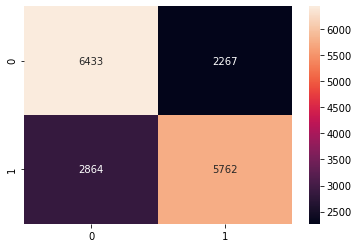

In [49]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred_lr = logreg.predict(x_test)

print('-'*100)

score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

print('-'*100)
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred_lr))

print('-'*100)
print('classification_report')
print(classification_report(y_test,y_pred_lr))

print('-'*100)
print('Model Accuracy Report')
print("Accuracy:",accuracy_score(y_test, y_pred_lr))

print('-'*100)
print('model accuracy train & test')
model = train_model(x_train, y_train, x_test, y_test, LogisticRegression)

print('-'*100)

#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(x_test, y_test)

#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(x_test, y_test)

# Confusion Matrix
matrix= confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix,annot = True, fmt = "d") # fmt = d is format = default

# precision Score
precision = precision_score(y_test, y_pred_lr)
print("Precision: ",precision)
print('-'*100)

# Recall
recall = recall_score(y_test, y_pred_lr)
print("Recall is: ",recall)
print('-'*100)

# F-Score (balance of precision and recall score)

print('F-Score')
print((2*precision*recall)/(precision+recall))
print('-'*100)

# Random Forest

In [50]:
# from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(x_train, y_train)

y_pred_rf = randfor.predict(x_test)
print(y_pred_rf)

[0 0 0 ... 0 0 1]


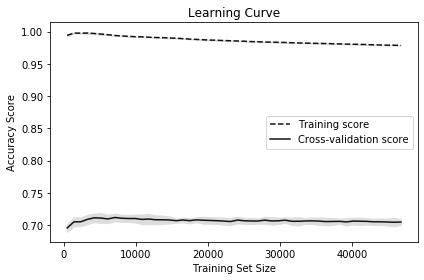

In [51]:
# Learning curve for Training score & cross validation score
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        x_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------
Model Accuracy Report
The accuracy score achieved using Random Forest is: 70.55 %
----------------------------------------------------------------------------------------------------
model accuracy train & test
Train accuracy: 97.73%
Test accuracy: 70.47%
----------------------------------------------------------------------------------------------------
confusion_matrix
[[6156 2544]
 [2559 6067]]
----------------------------------------------------------------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      8700
           1       0.70      0.70      0.70      8626

    accuracy                           0.71     17326
   macro avg       0.71      0.71      0.71     17326
weighted avg       0.71      0.71      0.71     17326

------------------------------------------------

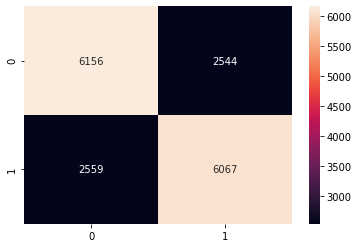

In [52]:
print('-'*100)
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print('Model Accuracy Report')
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

print('-'*100)
print('model accuracy train & test')
model = train_model(x_train, y_train, x_test, y_test, RandomForestClassifier)

print('-'*100)
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred_rf))

print('-'*100)
print('classification_report')
print(classification_report(y_test,y_pred_rf))


print('-'*100)
# Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

print('Random forest with 100 trees - Accuracy on Training & Test')
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))


print('-'*100)
# Now, let us prune the depth of trees and check the accuracy.
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(x_train, y_train)
print('Random forest depth of trees - Accuracy on Training & Test')
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))


# confusion matrix of Random Forest
matrix= confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")

print('-'*100)
# precision score
precision = precision_score(y_test, y_pred_rf)
print("Precision: ",precision)


print('-'*100)
# recall
recall = recall_score(y_test, y_pred_rf)
print("Recall is: ",recall)


print('-'*100)
# F score
print('F-Score')
print((2*precision*recall)/(precision+recall))
print('-'*100)

# Naive Bayes

Train accuracy: 61.34%
Test accuracy: 61.17%
----------------------------------------------------------------------------------------------------
Model Accuracy Report
The accuracy score achieved using Random Forest is: 61.17 %
----------------------------------------------------------------------------------------------------
confusion_matrix
[[7125 1575]
 [5153 3473]]
----------------------------------------------------------------------------------------------------
classification_report
              precision    recall  f1-score   support

           0       0.58      0.82      0.68      8700
           1       0.69      0.40      0.51      8626

    accuracy                           0.61     17326
   macro avg       0.63      0.61      0.59     17326
weighted avg       0.63      0.61      0.59     17326

----------------------------------------------------------------------------------------------------
Precision:  0.6879952456418383
---------------------------------------------

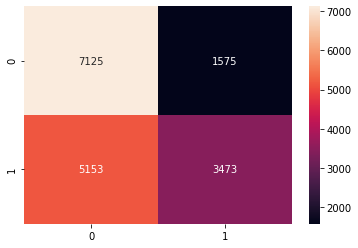

In [53]:
# from sklearn.naive_bayes import GaussianNB
nb = train_model(x_train, y_train, x_test, y_test, GaussianNB)

nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)
print('-'*100)

score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print('Model Accuracy Report')
print("The accuracy score achieved using Random Forest is: "+str(score_nb)+" %")

print('-'*100)
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred_nb))

print('-'*100)
print('classification_report')
print(classification_report(y_test,y_pred_nb))


# confusion matrix of Naive Bayes
matrix= confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matrix,annot = True, fmt = "d")

print('-'*100)
# precision score
precision = precision_score(y_test, y_pred_nb)
print("Precision: ",precision)

print('-'*100)
# recall
recall = recall_score(y_test, y_pred_nb)
print("Recall is: ",recall)

print('-'*100)
# f score
print('F-Score')
print((2*precision*recall)/(precision+recall))
print('-'*100)

# KNN(K Nearest Neighbors)

Train accuracy: 75.36%
Test accuracy: 70.55%
----------------------------------------------------------------------------------------------------
The accuracy score achieved using KNN is: 70.55 %
----------------------------------------------------------------------------------------------------
Train accuracy: 77.74%
Test accuracy: 69.32%
----------------------------------------------------------------------------------------------------
n_neigbors = 1
Train accuracy: 97.36%
Test accuracy: 63.12%
n_neigbors = 2
Train accuracy: 81.12%
Test accuracy: 63.98%
n_neigbors = 3
Train accuracy: 81.31%
Test accuracy: 67.64%
n_neigbors = 4
Train accuracy: 77.54%
Test accuracy: 67.75%
n_neigbors = 5
Train accuracy: 77.74%
Test accuracy: 69.32%
n_neigbors = 6
Train accuracy: 76.11%
Test accuracy: 69.72%
n_neigbors = 7
Train accuracy: 76.40%
Test accuracy: 70.12%
n_neigbors = 8
Train accuracy: 75.36%
Test accuracy: 70.55%
n_neigbors = 9
Train accuracy: 75.73%
Test accuracy: 70.66%
-----------------

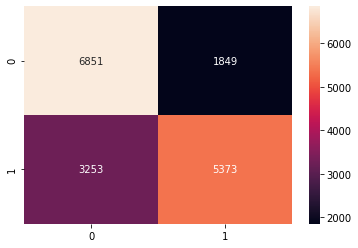

In [54]:
# from sklearn.neighbors import KNeighborsClassifier
knn = train_model(x_train, y_train, x_test, y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print('-'*100)
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

# KNN
print('-'*100)
from sklearn.neighbors import KNeighborsClassifier
model = train_model(x_train, y_train, x_test, y_test, KNeighborsClassifier)

print('-'*100)

# Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(x_train, y_train, x_test, y_test, KNeighborsClassifier, n_neighbors=i)


# Confusion matrix
matrix= confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")

print('-'*100)
# precision score
precision = precision_score(y_test, y_pred_knn)
print("Precision: ",precision)

print('-'*100)
# recall
recall = recall_score(y_test, y_pred_knn)
print("Recall is: ",recall)

print('-'*100)
# f score
print('F-Score')
print((2*precision*recall)/(precision+recall))
print('-'*100)

# Decision Tree

----------------------------------------------------------------------------------------------------
The accuracy score achieved using Decision Tree is: 72.79 %
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier Model Accuracy train & test
Accuracy on training set: 0.977
Accuracy on test set: 0.639
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier max_depth Model Accuracy train & test
Accuracy on training set: 0.725
Accuracy on test set: 0.728
----------------------------------------------------------------------------------------------------
Precision:  0.751413881748072
----------------------------------------------------------------------------------------------------
Recall is:  0.6777185253883607
----------------------------------------------------------------------------------------------------
F-Score
0.7126660977691089
--------------

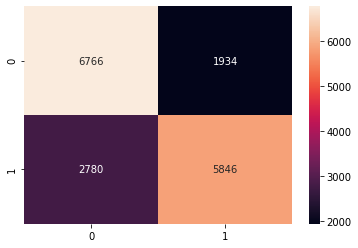

In [55]:
# from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

print('-'*100)
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

print('-'*100)
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(x_train, y_train)
print('DecisionTreeClassifier Model Accuracy train & test')
print("Accuracy on training set: {:.3f}".format(tree1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(x_test, y_test)))

print('-'*100)
# # Decision Tree Classifier max_depth
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(x_train, y_train)
print('DecisionTreeClassifier max_depth Model Accuracy train & test')
print("Accuracy on training set: {:.3f}".format(tree1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(x_test, y_test)))


# confusion matrix 
matrix= confusion_matrix(y_test, y_pred_dt)
sns.heatmap(matrix,annot = True, fmt = "d")

print('-'*100)
# precision score
precision = precision_score(y_test, y_pred_dt)
print("Precision: ",precision)

print('-'*100)
# recall
recall = recall_score(y_test, y_pred_dt)
print("Recall is: ",recall)

print('-'*100)
# f score
print('F-Score')
print((2*precision*recall)/(precision+recall))
print('-'*100)

# Final Score

In [56]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    accuracy.append(score)

In [57]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers,)       
summary

,accuracy
KNN,0.705529
Decision Trees,0.727923
Logistic Regression,0.703855
Naive Bayes,0.611682
Random Forests,0.705472


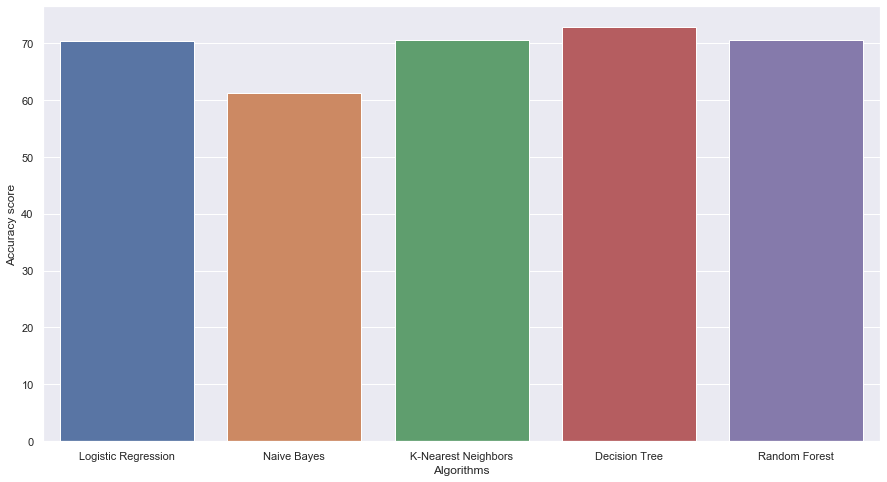

In [58]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"] 
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of dataset:

TP = True positive (has cardiovascular disease). TN = True negative (has no cardiovascular disease). FP = False positive (has no cardiovascular disease) FN = False negative (has cardiovascular disease)